# Introduction:
This project is about analyzing a dataset that contains information on metro interstate traffic volume for a specific location. The dataset includes various attributes like weather conditions, date, time, and the volume of traffic. The primary goal is to identify patterns in traffic flow and how they correlate with other variables like weather and time.

In [4]:
# Importing necessary libraries
import pandas as pd

# Reading the data into a DataFrame
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Displaying the first five rows of the DataFrame
print("First 5 rows:")
print(df.head())

# Displaying the last five rows of the DataFrame
print("\nLast 5 rows:")
print(df.tail())

# Getting more information about the dataset
print("\nDataset Info:")
df.info()


First 5 rows:
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  

Last 5 rows:
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None 

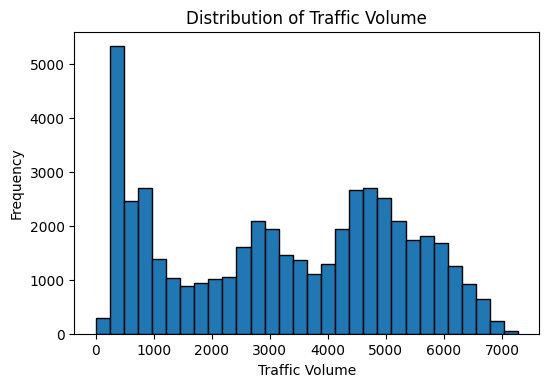

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Adding the %matplotlib inline magic for Jupyter Notebook
%matplotlib inline

# Plotting a histogram for the 'traffic_volume' column using Pandas method
df['traffic_volume'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# Using Series.describe() to get statistics about the 'traffic_volume' column
traffic_volume_stats = df['traffic_volume'].describe()
traffic_volume_stats


In [6]:
# Transform the 'date_time' column to datetime type using pd.to_datetime()
df['date_time'] = pd.to_datetime(df['date_time'])

# Use Series.dt.hour property to get the hour from 'date_time'
df['hour'] = df['date_time'].dt.hour

# Isolating daytime data (considering daytime as 6 AM to 6 PM)
daytime_data = df[(df['hour'] >= 6) & (df['hour'] <= 18)]

# Isolating nighttime data (considering nighttime as 7 PM to 5 AM)
nighttime_data = df[(df['hour'] < 6) | (df['hour'] > 18)]

# Optionally, show a few rows from each subset to confirm
print("Daytime data:")
print(daytime_data.head())

print("\nNighttime data:")
print(nighttime_data.head())


Daytime data:
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  hour  
0    scattered clouds 2012-10-02 09:00:00            5545     9  
1       broken clouds 2012-10-02 10:00:00            4516    10  
2     overcast clouds 2012-10-02 11:00:00            4767    11  
3     overcast clouds 2012-10-02 12:00:00            5026    12  
4       broken clouds 2012-10-02 13:00:00            4918    13  

Nighttime data:
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Cl

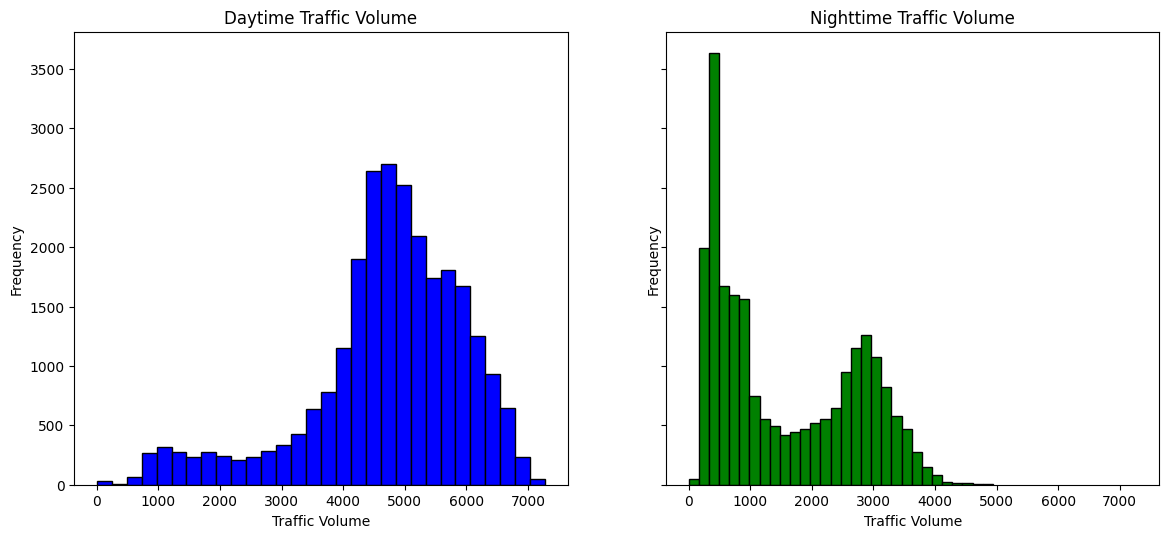

Daytime Stats:
count    25964.000000
mean      4712.087429
std       1281.625783
min          0.000000
25%       4232.000000
50%       4849.500000
75%       5597.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Nighttime Stats:
count    22240.000000
mean      1564.372572
std       1140.970036
min          0.000000
25%        484.000000
50%       1117.000000
75%       2693.000000
max       4939.000000
Name: traffic_volume, dtype: float64


In [7]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plotting histograms of 'traffic_volume' for both day and night side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plotting for daytime data
axs[0].hist(daytime_data['traffic_volume'], bins=30, edgecolor='black', color='blue')
axs[0].set_title('Daytime Traffic Volume')
axs[0].set_xlabel('Traffic Volume')
axs[0].set_ylabel('Frequency')

# Plotting for nighttime data
axs[1].hist(nighttime_data['traffic_volume'], bins=30, edgecolor='black', color='green')
axs[1].set_title('Nighttime Traffic Volume')
axs[1].set_xlabel('Traffic Volume')
axs[1].set_ylabel('Frequency')

plt.show()

# Using Series.describe() for statistics
daytime_stats = daytime_data['traffic_volume'].describe()
nighttime_stats = nighttime_data['traffic_volume'].describe()

print("Daytime Stats:")
print(daytime_stats)

print("\nNighttime Stats:")
print(nighttime_stats)


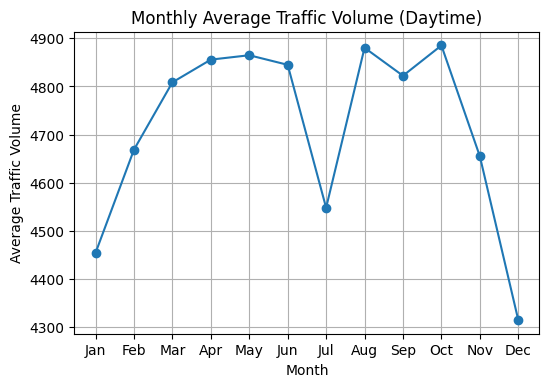

In [12]:
# Create a new DataFrame from the slice to avoid SettingWithCopyWarning
new_daytime_data = daytime_data.copy()

# Use .loc to create the 'month' column in the new DataFrame
new_daytime_data.loc[:, 'month'] = new_daytime_data['date_time'].dt.month

# Group by month and calculate mean
by_month = new_daytime_data.groupby('month').mean()

# Plotting the data
plt.plot(by_month.index, by_month['traffic_volume'], marker='o')
plt.title('Monthly Average Traffic Volume (Daytime)')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



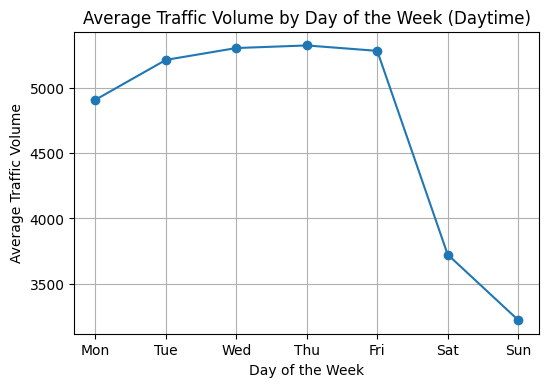

In [13]:
# Create a new DataFrame from daytime_data to avoid warnings
new_daytime_data = daytime_data.copy()

# Create a new column 'dayofweek' using dt.dayofweek
new_daytime_data['dayofweek'] = new_daytime_data['date_time'].dt.dayofweek

# Group by 'dayofweek' and calculate the mean
by_dayofweek = new_daytime_data.groupby('dayofweek').mean()

# Generate the line plot for average traffic volume by day of the week
plt.plot(by_dayofweek.index, by_dayofweek['traffic_volume'], marker='o')
plt.title('Average Traffic Volume by Day of the Week (Daytime)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()


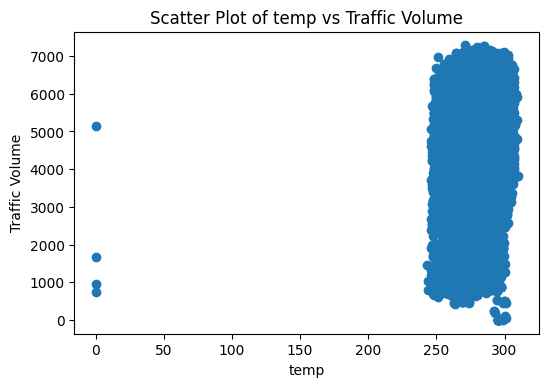

traffic_volume    1.000000
temp              0.126774
rain_1h           0.003320
snow_1h           0.001775
clouds_all       -0.022064
Name: traffic_volume, dtype: float64


In [14]:
# Calculate the correlation between 'traffic_volume' and numerical weather columns
correlation_with_weather = new_daytime_data[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr()

# Extract the correlation values with 'traffic_volume'
correlation_with_traffic_volume = correlation_with_weather['traffic_volume']

# Find the weather column with the strongest correlation with 'traffic_volume'
strongest_corr_column = correlation_with_traffic_volume.drop('traffic_volume').idxmax()

# Plot a scatter plot for the weather column with the strongest correlation and 'traffic_volume'
plt.scatter(new_daytime_data[strongest_corr_column], new_daytime_data['traffic_volume'])
plt.title(f'Scatter Plot of {strongest_corr_column} vs Traffic Volume')
plt.xlabel(strongest_corr_column)
plt.ylabel('Traffic Volume')
plt.show()

# Print the correlation values
print(correlation_with_traffic_volume)


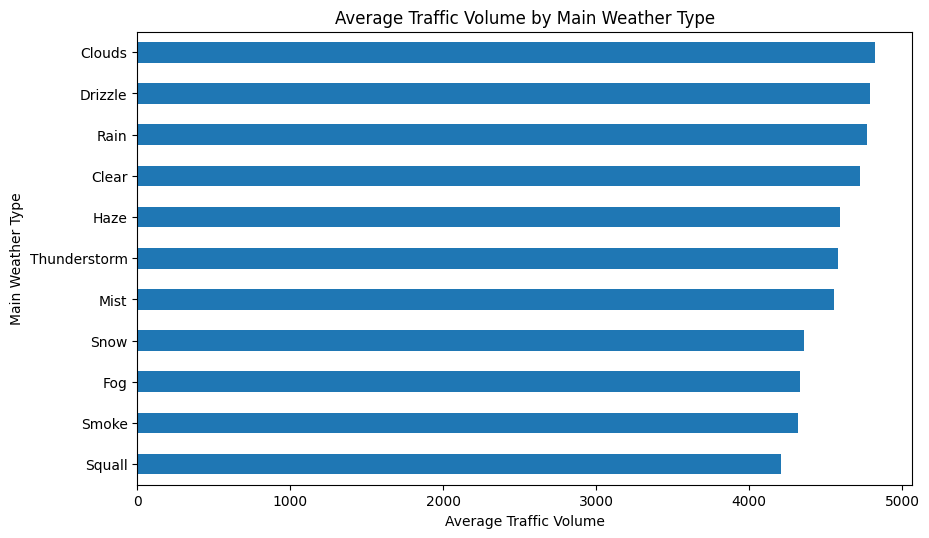

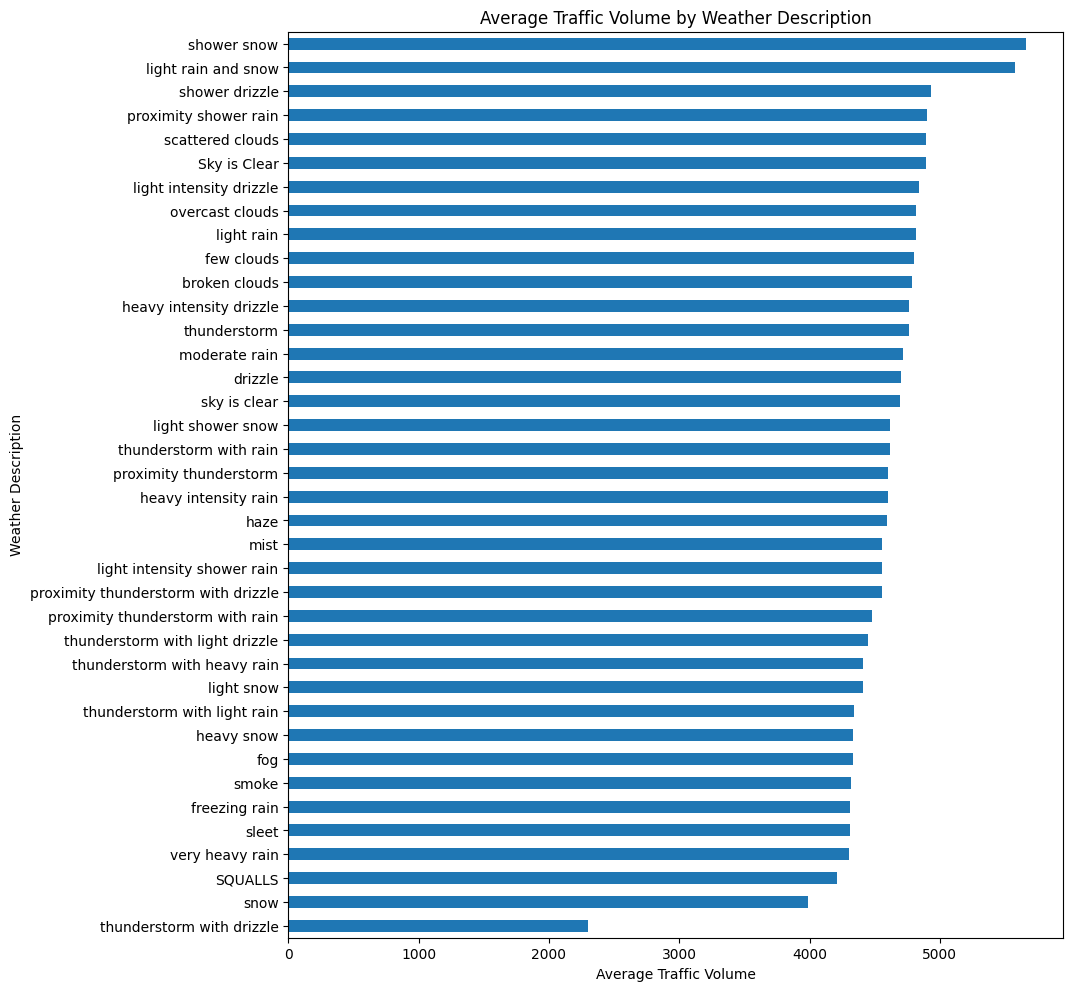

High Traffic Main Weather Types:
Empty DataFrame
Columns: [temp, rain_1h, snow_1h, clouds_all, traffic_volume, hour, month, dayofweek]
Index: []

High Traffic Weather Descriptions:
                         temp  rain_1h  snow_1h  clouds_all  traffic_volume  \
weather_description                                                           
light rain and snow  275.6075   0.3175      0.0        83.5         5579.75   
shower snow          268.6800   0.0000      0.0        90.0         5664.00   

                     hour  month  dayofweek  
weather_description                          
light rain and snow  15.0    7.5       1.25  
shower snow           7.0    3.0       4.00  


In [15]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Group the data by 'weather_main' and 'weather_description' and calculate the mean
by_weather_main = new_daytime_data.groupby('weather_main').mean()
by_weather_description = new_daytime_data.groupby('weather_description').mean()

# Plot a horizontal bar plot for 'by_weather_main'
plt.figure(figsize=(10, 6))
by_weather_main['traffic_volume'].sort_values().plot(kind='barh')
plt.title('Average Traffic Volume by Main Weather Type')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Main Weather Type')
plt.show()

# Plot a horizontal bar plot for 'by_weather_description'
plt.figure(figsize=(10, 12))
by_weather_description['traffic_volume'].sort_values().plot(kind='barh')
plt.title('Average Traffic Volume by Weather Description')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

# Identify weather types where traffic volume exceeds 5000
high_traffic_main = by_weather_main[by_weather_main['traffic_volume'] > 5000]
high_traffic_desc = by_weather_description[by_weather_description['traffic_volume'] > 5000]

print("High Traffic Main Weather Types:")
print(high_traffic_main)

print("\nHigh Traffic Weather Descriptions:")
print(high_traffic_desc)


## Final Conclusions

### Time Indicators:
- **Warm Months vs Cold Months**: My analysis showed that traffic tends to be heavier during the warm months of March to October. This is useful for planning travel or infrastructure maintenance.
  
- **Business Days vs Weekends**: Traffic volume is higher during weekdays, especially Monday through Friday. This suggests that the majority of the traffic could be work-related.
  
- **Rush Hours**: Rush hours around 7 AM and 4 PM during business days are the busiest times on the road.

### Weather Indicators:
- **General Weather Conditions**: Interestingly, weather conditions like temperature, rain, and snow don't have a strong correlation with traffic volume.
  
- **Specific Weather Conditions**: However, very specific weather conditions like "Shower Snow" and "Light Rain and Snow" did show traffic volumes exceeding 5,000 cars. While not the most frequent conditions, they could still be considered when anticipating heavy traffic.

### Next Steps:
- **Nighttime Data**: The focus has been on daytime data due to its higher traffic volume. It would be interesting to analyze nighttime data to see if different patterns or indicators emerge.
  
- **Detailed Analysis**: Further analysis could delve into more specific time-based indicators like public holidays, or even more granular weather conditions.

This analysis provides a good starting point for understanding the factors that contribute to heavy traffic on I-94. It's an ongoing study that could be enhanced with more data and different analytical methods.
